# <font color='green'> MAVEN ANALYTICS KICKSTARTER PROJECT CHALLENGE </font>

# Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

##### Reading the data

In [2]:
data = pd.read_csv('kickstarter_projects.csv')
data.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [4]:
data.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [5]:
print('The unique values of each columns are;\n')
for column in data.columns:
    print(f'{column} ------------> {len(data[column].unique())}')

The unique values of each columns are;

ID ------------> 374853
Name ------------> 372061
Category ------------> 15
Subcategory ------------> 159
Country ------------> 22
Launched ------------> 374297
Deadline ------------> 3164
Goal ------------> 27692
Pledged ------------> 39989
Backers ------------> 3963
State ------------> 5


## Getting data ready for analysis

**feature encoding on `state` column**

In [6]:
encoded_state = pd.get_dummies(data['State'])
encoded_state

,Canceled,Failed,Live,Successful,Suspended
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
374848,0,0,1,0,0
374849,0,0,1,0,0
374850,0,0,1,0,0
374851,0,0,1,0,0


In [7]:
df = pd.concat([data.drop('State', axis=1), encoded_state], axis=1)
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,Canceled,Failed,Live,Successful,Suspended
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,1,0,0,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,1,0,0,0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,0,0,0,1,0
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,0,0,0,1,0
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,1,0,0,0


In [8]:
data['State'].value_counts()

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: State, dtype: int64

In [9]:
df.loc[:, 'Canceled':].sum().sort_values(ascending=False)

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
dtype: int64

* Cell 8 and Cell 9 confirms that our dummy variables are correctly done

## Univariate analysis on STATE OF PROJECTS

In [10]:
state = pd.Series(df.loc[:, 'Canceled':].sum(), name='STATE OF PROJECT')
state_sum = state.sum()
print(f'Total number of projects: {state_sum}')
state

Total number of projects: 374853


Canceled       38751
Failed        197611
Live            2798
Successful    133851
Suspended       1842
Name: STATE OF PROJECT, dtype: int64

In [11]:
total = '374853 projects'

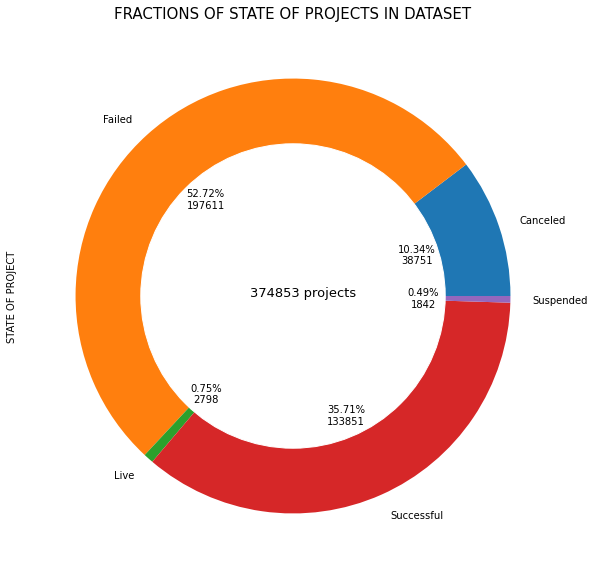

In [12]:
def percent_value(x):
    return '{:.2f}%\n{:.0f}'.format(x, (state_sum*x)/100)

state.plot(kind='pie', figsize=(10,10), autopct=percent_value)
my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.text(-0.2, 0, '%s' %total, fontsize=13)
plt.title('FRACTIONS OF STATE OF PROJECTS IN DATASET', fontsize=15)
plt.show()

# Q1

**Which category has the highest success percentage?**

**Thought process**
* group by category
* apply the Success percentage formular to create the SuccessPercentage column
* sort values by SuccessPercentage in descending order and identify the category with the highest success percentage

`Success Percentage` $=$ `(Sum of successful projects` / `Sum of projects) *100%`

In [13]:
#grouping by category
group = df.groupby('Category') 

In [14]:
#getting the total number of projects and the sum of successful projects in each category
q1 = group.agg({'Successful': ['sum', 'count']})
q1

Successful       
                    sum  count
Category                      
Art             11510.0  28151
Comics           5842.0  10819
Crafts           2115.0   8809
Dance            2338.0   3767
Design          10549.0  30065
Fashion          5593.0  22812
Film & Video    23612.0  62694
Food             6085.0  24599
Games           12518.0  35225
Journalism       1012.0   4754
Music           24105.0  49529
Photography      3305.0  10778
Publishing      12300.0  39378
Technology       6433.0  32562
Theater          6534.0  10911

In [15]:
#renaming columns of q1
q1.columns = ['TotalSuccess', 'TotalProjects'] 

In [16]:
q1

,TotalSuccess,TotalProjects
Category,,
Art,11510.0,28151
Comics,5842.0,10819
Crafts,2115.0,8809
Dance,2338.0,3767
Design,10549.0,30065
Fashion,5593.0,22812
Film & Video,23612.0,62694
Food,6085.0,24599
Games,12518.0,35225


In [17]:
#applying success percentage on each category
q1['SuccessPercentage'] = round((q1['TotalSuccess']/q1['TotalProjects'])*100, 2)
q1

,TotalSuccess,TotalProjects,SuccessPercentage
Category,,,
Art,11510.0,28151,40.89
Comics,5842.0,10819,54.00
Crafts,2115.0,8809,24.01
Dance,2338.0,3767,62.07
Design,10549.0,30065,35.09
Fashion,5593.0,22812,24.52
Film & Video,23612.0,62694,37.66
Food,6085.0,24599,24.74
Games,12518.0,35225,35.54


In [18]:
#sorting category by success percentage 
q1 = q1.sort_values('SuccessPercentage', ascending=False) 
q1

,TotalSuccess,TotalProjects,SuccessPercentage
Category,,,
Dance,2338.0,3767,62.07
Theater,6534.0,10911,59.88
Comics,5842.0,10819,54.00
Music,24105.0,49529,48.67
Art,11510.0,28151,40.89
Film & Video,23612.0,62694,37.66
Games,12518.0,35225,35.54
Design,10549.0,30065,35.09
Publishing,12300.0,39378,31.24


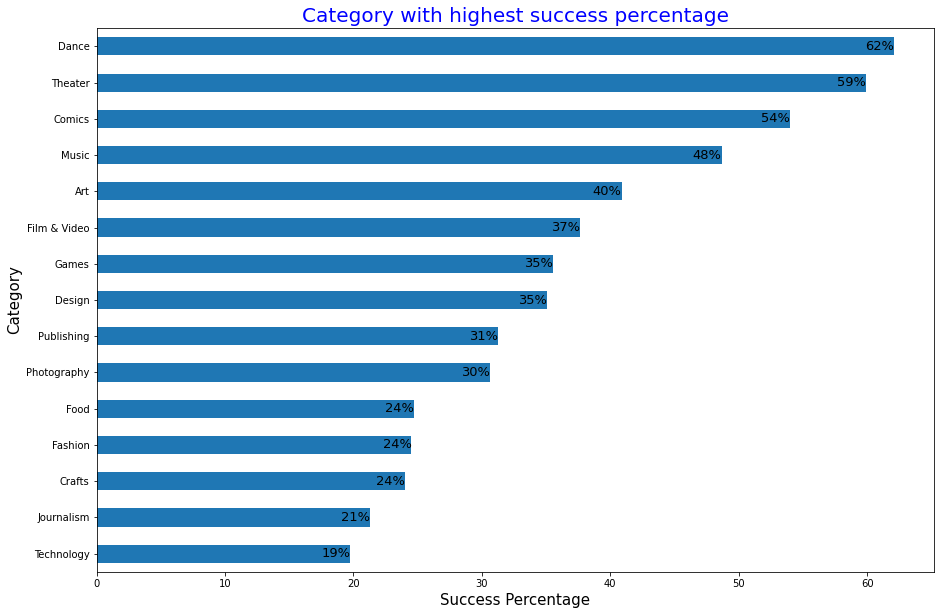

In [19]:
#horizontal bar chart of the category and their success percentage

q1_chart = q1.sort_values('SuccessPercentage')['SuccessPercentage']
q1_chart.plot(kind='barh', figsize=(15,10))
plt.xlabel('Success Percentage', fontsize=15)
plt.ylabel('Category', fontsize=15)
plt.title('Category with highest success percentage', fontsize=20, color='blue')
for x, y in zip(q1_chart.values, np.arange(len(q1_chart))):
    plt.text(x, y, '%d%%' %x, ha='right', va='center', fontsize=13);

> The category with the highest success percentage is `Dance`<br>
> The least successful category based on ratio of successful project to total project is `Technology`
* The success percentage by category in descending order are as follows;

**Dance > Theater > Comics > Music > Art > Film & Video > Games > Design > Publishing > Photography > Food > Fashion > Crafts > Journalism > Technology**

**How many projects have been successful ?**

In [20]:
total_projects = int(q1.TotalSuccess.sum()) # total number of successful projects across all categories
dance_success_projects = int(q1.TotalSuccess[0]) #total number of successful projects in Dance category

In [21]:
print(f'The total number of successful projects is {total_projects}\n')
print(f'The total number successful projects in {q1.index[0]} category is {dance_success_projects}')

The total number of successful projects is 133851

The total number successful projects in Dance category is 2338


> There are 133851 successful projects across all categories in the dataset with Dance category having 2338 successful projects.

# Q2

**What project with a goal over 1,000 USD, had the highest goal completion % (Pledge/Goal)?**

**Thought process**

* select features to work with
* Apply the Goal Completion % formular
* Filter out projects with pledged less than $1000 USD
* sort values by Goal Completion % and identify the project with the highset value

In [22]:
#selecting the needed feaetures to work with; Name, Pledged, and Goal columns
q2 = df[['Name', 'Pledged', 'Goal']]
q2

,Name,Pledged,Goal
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,625,1000
1,CRYSTAL ANTLERS UNTITLED MOVIE,22,80000
2,drawing for dollars,35,20
3,Offline Wikipedia iPhone app,145,99
4,Pantshirts,387,1900
...,...,...,...
374848,Americas Got Talent - Serious MAK,0,500
374849,EVO Planner: The World's First Personalized Fl...,269,15000
374850,"Help save La Gattara, Arizona's first Cat Cafe!",165,10000
374851,Digital Dagger Coin,7,650


`Goal Completion %` $=$ `Pledged` / `Goal`

In [23]:
#implementing the formular above
q2['Goal Completion %'] = round((q2['Pledged']/q2['Goal'])*100, 2)
q2

,Name,Pledged,Goal,Goal Completion %
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,625,1000,62.50
1,CRYSTAL ANTLERS UNTITLED MOVIE,22,80000,0.03
2,drawing for dollars,35,20,175.00
3,Offline Wikipedia iPhone app,145,99,146.46
4,Pantshirts,387,1900,20.37
...,...,...,...,...
374848,Americas Got Talent - Serious MAK,0,500,0.00
374849,EVO Planner: The World's First Personalized Fl...,269,15000,1.79
374850,"Help save La Gattara, Arizona's first Cat Cafe!",165,10000,1.65
374851,Digital Dagger Coin,7,650,1.08


In [24]:
q2 = q2[q2['Goal']>1000] #filter out projects with Goal less than 1,000 and keep projects with Goal greater than 1,000
q2 = q2.sort_values('Goal Completion %', ascending=False)[:10] #sort goal completion % in descending order and take firs ten
q2 = q2.set_index('Name').sort_values('Goal Completion %') #set index to Name and sort Gaol completion values
q2

,Pledged,Goal,Goal Completion %
Name,,,
"Gravity: The Weighted Blanket for Sleep, Stress and Anxiety",4729263,21500,21996.57
SMART BELT - Kevlar® Core Indestructible & Micro Adjustment,1174805,5000,23496.10
Redefining Italian Luxury Watches - Filippo Loreti,5020667,20878,24047.64
ClickPack Pro | The Best Functional Anti-theft BackPack,1206179,5000,24123.58
COOLEST COOLER: 21st Century Cooler that's Actually Cooler,13285226,50000,26570.45
Bears vs Babies - A Card Game,3215680,10000,32156.80
Joking Hazard,3246589,10000,32465.89
Fidget Cube: A Vinyl Desk Toy,6465690,15000,43104.60
The World's Best TRAVEL JACKET with 15 Features || BAUBAX,9192056,20000,45960.28


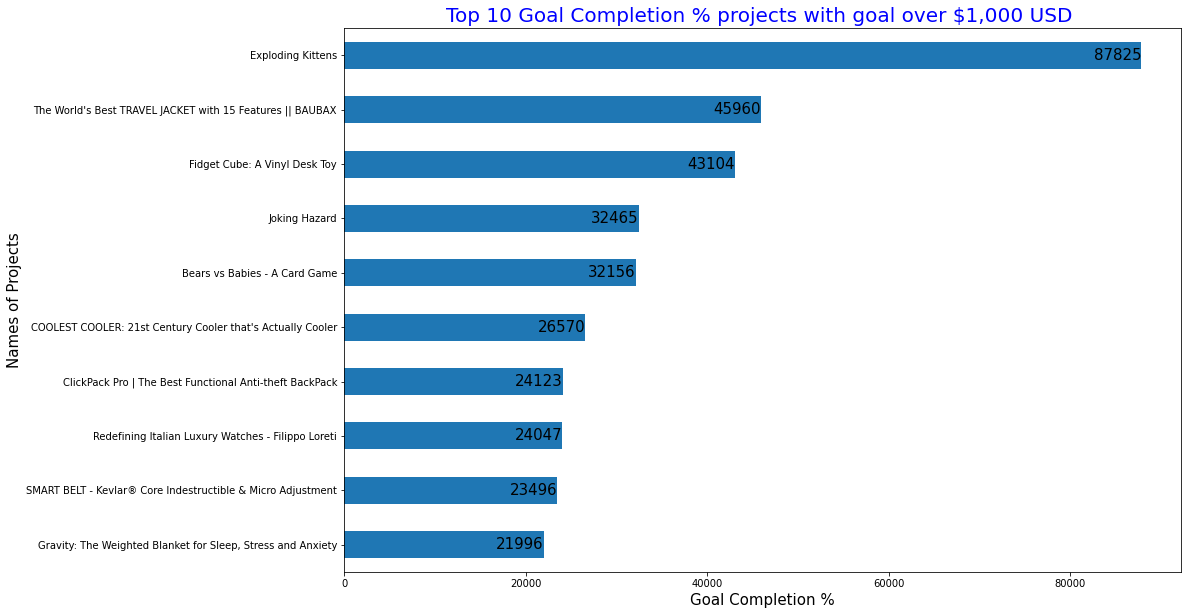

In [25]:
#Goal Completion % horizontal bar plot

q2['Goal Completion %'].plot(kind='barh', figsize=(15,10))
plt.xlabel('Goal Completion %', fontsize=15)
plt.ylabel('Names of Projects', fontsize=15)
plt.title('Top 10 Goal Completion % projects with goal over $1,000 USD ', fontsize=20, color='blue')
for x, y in zip(q2['Goal Completion %'].values, np.arange(len(q2))):
    plt.text(x, y, '%d' %x, ha='right', va='center', fontsize=15)

> Amongst projects with goal over $1000 USD, `Exploding Kittens project` had the biggest goal completion %  

**How much money was pledged**

In [26]:
pledge = q2.iloc[9,0]
print(f'Exploding Kittens project had {pledge} in pledge')

Exploding Kittens project had 8782572 in pledge


> Exploding Kittens project had $8782572 USD pledged.

# Q3

**Can you identify any trends in project success rates over the years**

**Thought process**

* select features needed
* create a Launch year column from the Launched column to eliminate noise from trend
* group by LaunchYear
* calcuate the success rate using its formular
* plot trend line across years and identify if its an upward or downward trend.

`Success Rate` $=$ `Sum of successful projects` / `Sum of projects`

In [27]:
#Extracting the required features to work with; Category, Launched, Deadline, Successful
q3 = df[['Category' ,'Launched', 'Deadline', 'Successful']]
q3.head()

,Category,Launched,Deadline,Successful
0,Fashion,2009-04-21 21:02:48,2009-05-31,0
1,Film & Video,2009-04-23 00:07:53,2009-07-20,0
2,Art,2009-04-24 21:52:03,2009-05-03,1
3,Technology,2009-04-25 17:36:21,2009-07-14,1
4,Fashion,2009-04-27 14:10:39,2009-05-26,0


In [28]:
#Getting the launch year of all projects
q3['LaunchYear'] = q3['Launched'].apply(lambda x: str(x)[:4])
q3

,Category,Launched,Deadline,Successful,LaunchYear
0,Fashion,2009-04-21 21:02:48,2009-05-31,0,2009
1,Film & Video,2009-04-23 00:07:53,2009-07-20,0,2009
2,Art,2009-04-24 21:52:03,2009-05-03,1,2009
3,Technology,2009-04-25 17:36:21,2009-07-14,1,2009
4,Fashion,2009-04-27 14:10:39,2009-05-26,0,2009
...,...,...,...,...,...
374848,Music,2018-01-02 14:13:09,2018-01-16,0,2018
374849,Design,2018-01-02 14:15:38,2018-02-09,0,2018
374850,Food,2018-01-02 14:17:46,2018-01-16,0,2018
374851,Art,2018-01-02 14:38:17,2018-02-01,0,2018


In [29]:
#grouping by Launch year and getting the total number of projects and successful projects in each year
q3_group = q3.groupby('LaunchYear').agg(TotalProjects= pd.NamedAgg('Successful', 'count'),
                                        TotalSuccess=pd.NamedAgg('Successful', 'sum'))
q3_group

,TotalProjects,TotalSuccess
LaunchYear,,
2009,1329,579.0
2010,10519,4593.0
2011,26236,12171.0
2012,41161,17892.0
2013,44836,19402.0
2014,66993,21106.0
2015,74919,20971.0
2016,56536,18675.0
2017,52200,18462.0


`Success Rate` $=$ `Sum of successful projects` / `Sum of projects`

In [30]:
#Calculating for success rate
q3_group['SuccessRate'] = round((q3_group['TotalSuccess']/q3_group['TotalProjects'])*100, 2)
q3_group

,TotalProjects,TotalSuccess,SuccessRate
LaunchYear,,,
2009,1329,579.0,43.57
2010,10519,4593.0,43.66
2011,26236,12171.0,46.39
2012,41161,17892.0,43.47
2013,44836,19402.0,43.27
2014,66993,21106.0,31.50
2015,74919,20971.0,27.99
2016,56536,18675.0,33.03
2017,52200,18462.0,35.37


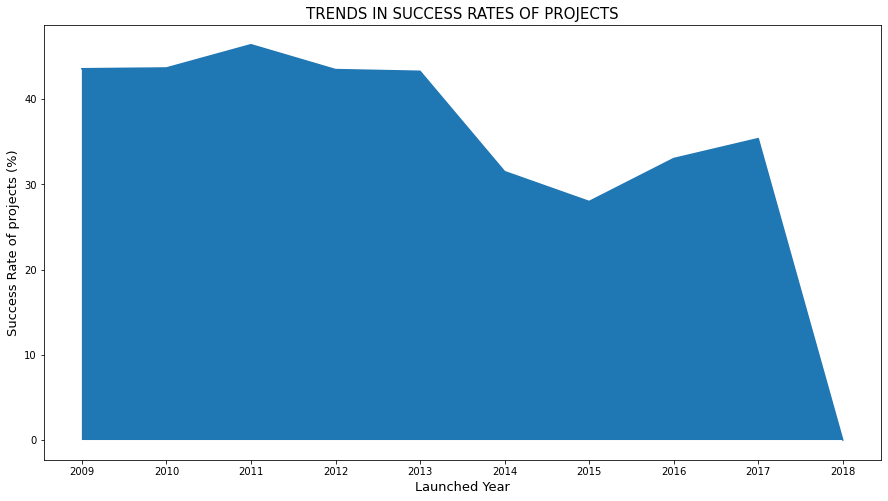

In [31]:
# Projects success rate trend

q3_group['SuccessRate'].plot(figsize=(15,8))
plt.fill_between(q3_group.index, q3_group['SuccessRate'].values) #filling up the line chart to get an area chart
plt.xticks(np.arange(len(q3_group)), q3_group.index)
plt.xlabel('Launched Year', fontsize=13) #set xlabel
plt.ylabel('Success Rate of projects (%)', fontsize=13) #set ylabel
plt.title('TRENDS IN SUCCESS RATES OF PROJECTS', fontsize=15) #set title of graph
plt.show()

>There is generally a downward trend in the projects' success rates over the years, projects launched in the year 2011 had the highest success rates.

# Q4

**As an investor, what types of projects should you be looking at to garauntee future success**

**Thought process**

* get a copy of the data used in question 3
* group by category of project
* create a for loop that;
    * groups each category by launch year
    * calculate the success rate of each year across all individually grouped categories
    * do an area line plot showing the trend in each category.
* from the charts gotten, identify which category has the best positive success rate trend
* further investigate what subcategory would be the best choice
    * find the success rate of subcategory to know top choice by overall success rate
    * repeat the sub steps under the for loop in COMICS subcategory to identify top choice by success rate trend.

In [32]:
#get a copy of q3 data
q4 = q3.copy()
q4.head()

,Category,Launched,Deadline,Successful,LaunchYear
0,Fashion,2009-04-21 21:02:48,2009-05-31,0,2009
1,Film & Video,2009-04-23 00:07:53,2009-07-20,0,2009
2,Art,2009-04-24 21:52:03,2009-05-03,1,2009
3,Technology,2009-04-25 17:36:21,2009-07-14,1,2009
4,Fashion,2009-04-27 14:10:39,2009-05-26,0,2009


In [33]:
#group by category to investigate trends
q4_groups = q4.groupby('Category')

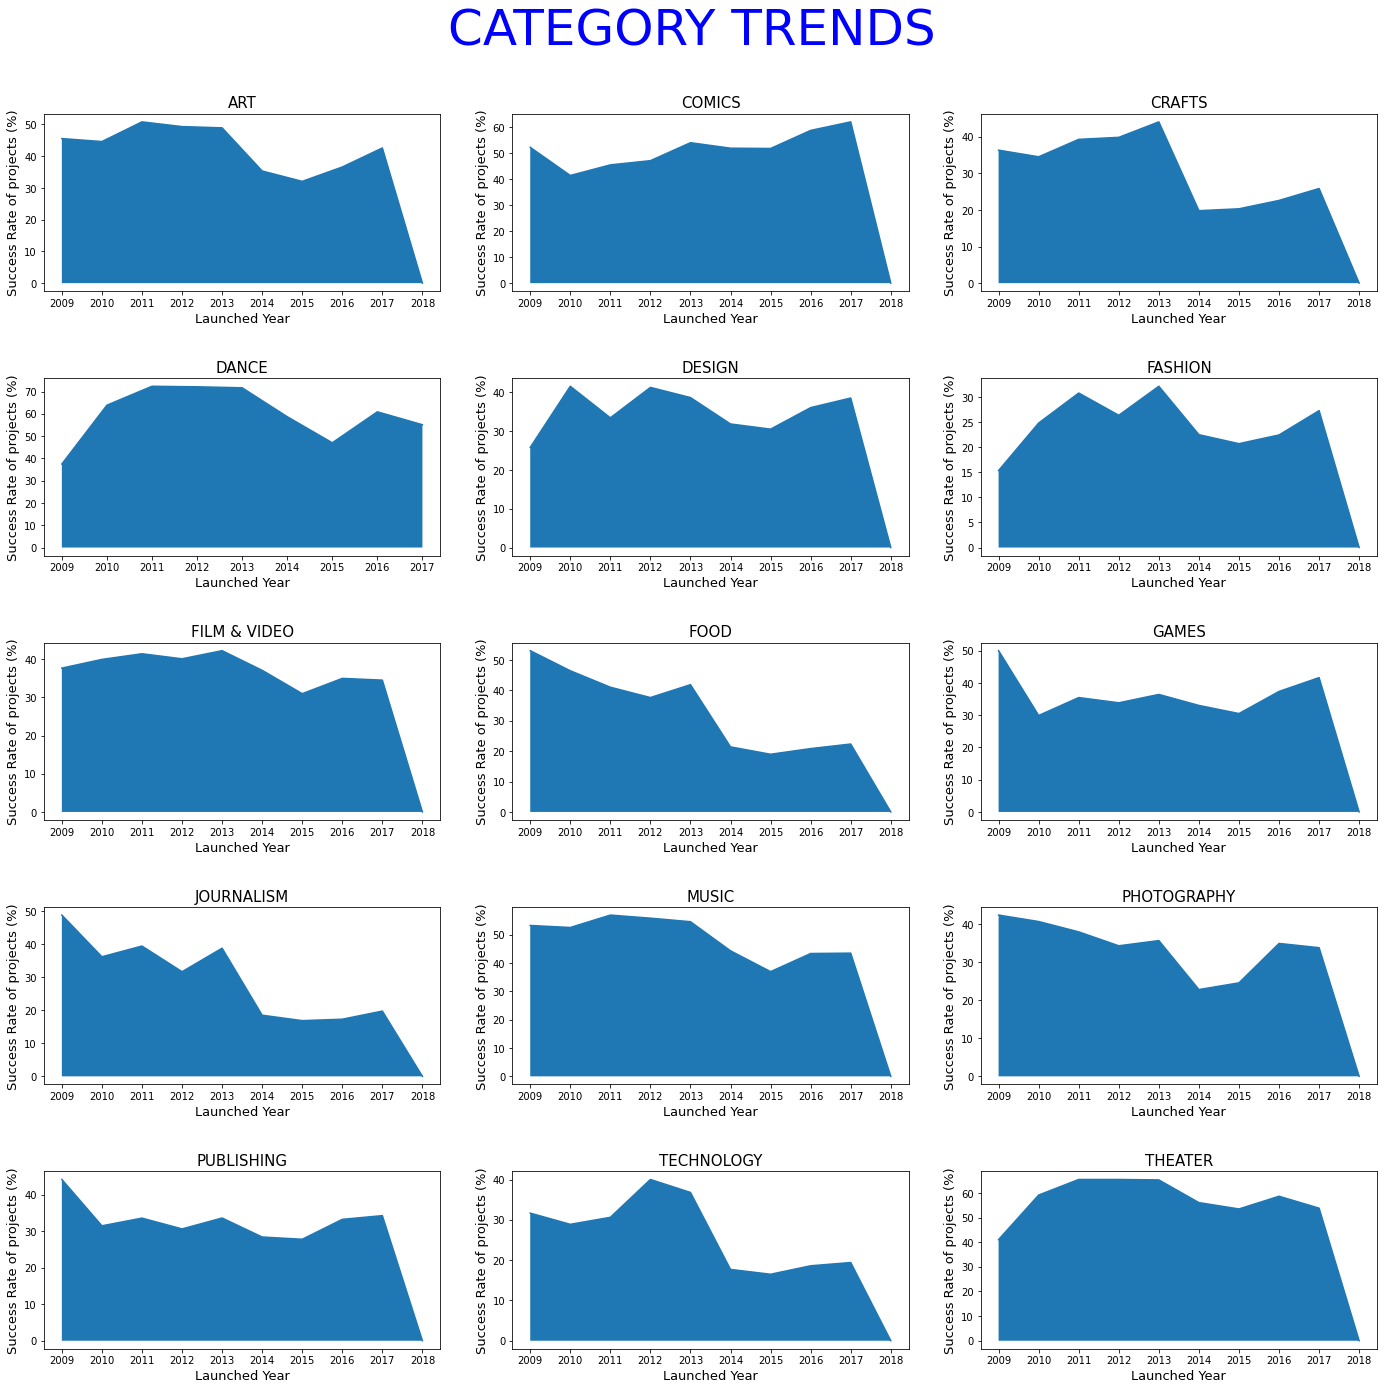

In [34]:
#area line plots success rate trends over the years for each category

keys = q4_groups.groups.keys() #keys of the category groupby
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
for category, ax in zip(keys, ax.flatten()):
    df4 = q4.loc[q4_groups.groups.get(str(category)), :]
    df4 = df4.groupby('LaunchYear').agg(TotalProjects= pd.NamedAgg('Successful', 'count'),
                                      TotalSuccess=pd.NamedAgg('Successful', 'sum'))
    df4['SuccessRate'] = round((df4['TotalSuccess']/df4['TotalProjects'])*100, 2)
    df4['SuccessRate'].plot(ax=ax)
    ax.fill_between(df4.index, df4['SuccessRate'].values)
    ax.set_xticks(np.arange(len(df4)))
    ax.set_xticklabels(df4.index)
    ax.set_xlabel('Launched Year', fontsize=13)
    ax.set_ylabel('Success Rate of projects (%)', fontsize=13)
    ax.set_title(str(category).upper(), fontsize=15)

fig.suptitle('CATEGORY TRENDS', fontsize=50, color='blue')
fig.tight_layout(pad=3.5)

**Further investigate Comic Subcategory**

In [35]:
df4 = df.copy()
df4.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,Canceled,Failed,Live,Successful,Suspended
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,1,0,0,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,1,0,0,0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,0,0,0,1,0
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,0,0,0,1,0
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,1,0,0,0


In [36]:
df_4 = df4[df4['Category']=='Comics']
df_4.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,Canceled,Failed,Live,Successful,Suspended
51,98766802,goopymart: chimples plush toy,Comics,Comics,United States,2009-05-13 16:54:34,2009-08-11,19000,875,26,0,1,0,0,0
52,1469107279,goopymart: portable geek plushie,Comics,Comics,United States,2009-05-13 16:56:11,2009-08-11,19000,320,9,0,1,0,0,0
53,1647836132,Out of This World Comic Book Project,Comics,Comics,United States,2009-05-13 17:31:34,2009-08-11,2000,55,2,0,1,0,0,0
88,1451130282,Comic Remix,Comics,Comics,United States,2009-05-30 05:00:36,2009-06-15,60,72,6,0,0,0,1,0
127,883883729,Alphonse: Issue Two,Comics,Comics,United States,2009-06-10 23:04:11,2009-07-30,4600,4810,56,0,0,0,1,0


In [37]:
df_4 = df_4.groupby('Subcategory').agg(TotalProjects= pd.NamedAgg('Successful', 'count'),
                                        TotalSuccess=pd.NamedAgg('Successful', 'sum'))
df_4

,TotalProjects,TotalSuccess
Subcategory,,
Anthologies,405,303.0
Comic Books,2743,1614.0
Comics,4996,2506.0
Events,163,50.0
Graphic Novels,1864,1011.0
Webcomics,648,358.0


In [38]:
df_4['SuccessRate'] = round((df_4['TotalSuccess']/df_4['TotalProjects'])*100, 2)
df_4

,TotalProjects,TotalSuccess,SuccessRate
Subcategory,,,
Anthologies,405,303.0,74.81
Comic Books,2743,1614.0,58.84
Comics,4996,2506.0,50.16
Events,163,50.0,30.67
Graphic Novels,1864,1011.0,54.24
Webcomics,648,358.0,55.25


In [39]:
df_4 = df_4.sort_values('SuccessRate')
df_4

,TotalProjects,TotalSuccess,SuccessRate
Subcategory,,,
Events,163,50.0,30.67
Comics,4996,2506.0,50.16
Graphic Novels,1864,1011.0,54.24
Webcomics,648,358.0,55.25
Comic Books,2743,1614.0,58.84
Anthologies,405,303.0,74.81


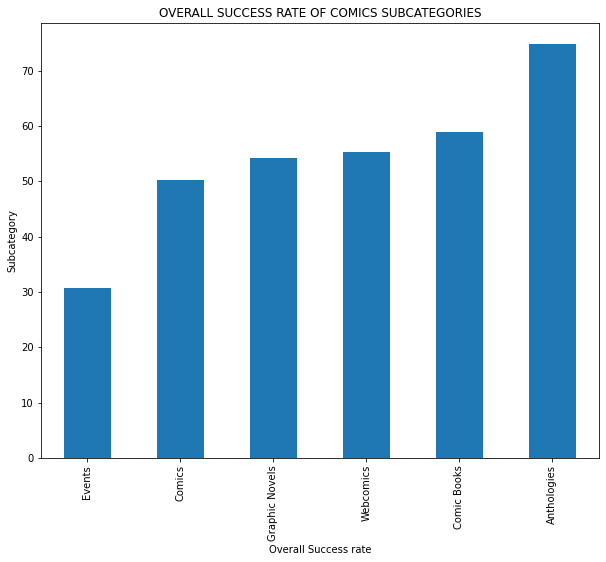

In [40]:
df_4['SuccessRate'].plot(kind='bar', figsize=(10,8))
plt.title('OVERALL SUCCESS RATE OF COMICS SUBCATEGORIES')
plt.xlabel('Overall Success rate')
plt.ylabel('Subcategory');

> **Based on Overall success rate**<br>
> Anthologies seems to have the highest success rate over the years leaving Events as the Comics subcategory with the least success rate.
* Judging by the overall success rate of the subcategories in Comics, `Anthologies` would be the obvious choice.

NB: There might be a different choice if we investigate the trends over the years for each subcategory in comics 

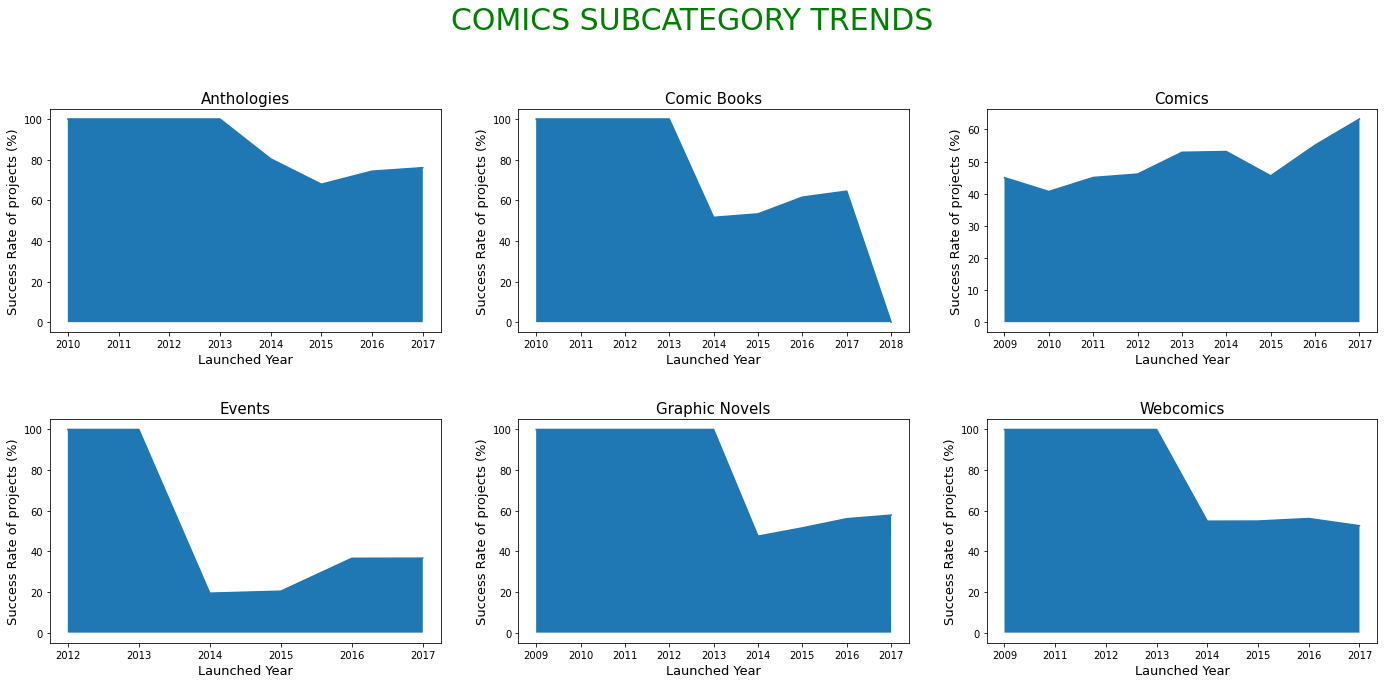

In [41]:
df_4 = df4[df4['Category']=='Comics']
q4_groups = df_4.groupby('Subcategory')
#area line plots success rate trends over the years for each category

keys = q4_groups.groups.keys() #keys of the category groupby
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
for category, ax in zip(keys, ax.flatten()):
    df4 = q4.loc[q4_groups.groups.get(str(category)), :]
    df4 = df4.groupby('LaunchYear').agg(TotalProjects= pd.NamedAgg('Successful', 'count'),
                                      TotalSuccess=pd.NamedAgg('Successful', 'sum'))
    df4['SuccessRate'] = round((df4['TotalSuccess']/df4['TotalProjects'])*100, 2)
    df4['SuccessRate'].plot(ax=ax)
    ax.fill_between(df4.index, df4['SuccessRate'].values)
    ax.set_xticks(np.arange(len(df4)))
    ax.set_xticklabels(df4.index)
    ax.set_xlabel('Launched Year', fontsize=13)
    ax.set_ylabel('Success Rate of projects (%)', fontsize=13)
    ax.set_title(str(category).title(), fontsize=15)

fig.suptitle('COMICS SUBCATEGORY TRENDS', fontsize=30, color='green')
fig.tight_layout(pad=3.5)

> **Based on success rate trend in Comics subcategories**<br>
> As suspected, the best choice of subcategory changed; from Anthologies to Comics subcategory based on the trend of success rate over the year.
> All subcategory started out great with success rate of 100%, but they experienced a huge decline in the year 2013. All except comics subcategory which kept a fairly constant success rate. 

* Although Comics subcategory has an overall success rate of 50.15% coming in 5th place, it is the only subcategory of COMICS that has a progressive rise in success rate over the years as shown in the trend above. Which is safe to say that the rise in success rate is garaunteed, unlike the rest which had a huge drop after the year 2013.